# Loading Data Using Pandas

In [1]:
import pandas as pd

df = pd.read_csv('ipl_data.csv')

# To verify that the data has been loaded correctly and to get an initial overview of the columns and values.
print(df.head())

# Structure of the dataset in the form (number of rows, number of columns).
print("Shape of sample data" , df.shape)

# Summary of the DataFrame including the data types and non-null values.
print(df.info())

   mid        date                  venue               bat_team  \
0    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
1    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
2    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
3    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
4    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   

                     bowl_team      batsman   bowler  runs  wickets  overs  \
0  Royal Challengers Bangalore   SC Ganguly  P Kumar     1        0    0.1   
1  Royal Challengers Bangalore  BB McCullum  P Kumar     1        0    0.2   
2  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.2   
3  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.3   
4  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.4   

   runs_last_5  wickets_last_5  striker  non-striker  total  
0            1               0        0            0    222 

# Visualizing No. of matches per Venue

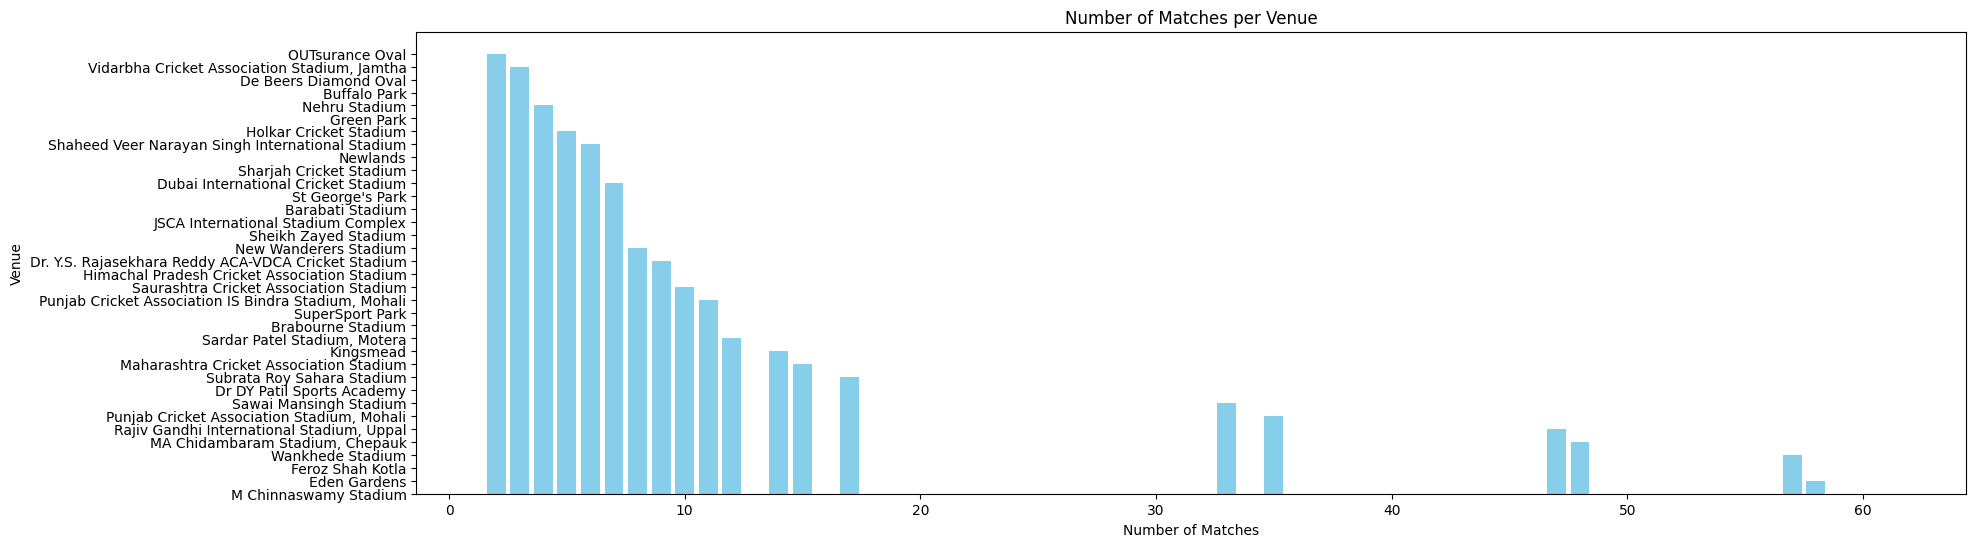

In [9]:
import matplotlib.pyplot as plt

data = df.copy()
matches_per_venue = data[['mid', 'venue']].drop_duplicates()
matches_count = matches_per_venue['venue'].value_counts()


plt.figure(figsize=(20, 6))
plt.bar(matches_count.values, matches_count.index, color='skyblue')
plt.title('Number of Matches per Venue')
plt.xlabel('Number of Matches')
plt.ylabel('Venue')
plt.show()

# Drop Unnecessary Columns

In [10]:
df = df.drop(columns=[
    'mid', 'date', 'batsman', 'bowler',
    'striker', 'non-striker'
])

print("Shape of data after dropping columns" , df.shape)

Shape of data after dropping columns (76014, 9)


# Encode Categorical Columns

In [11]:
from sklearn.preprocessing import LabelEncoder

le_bat = LabelEncoder()
le_bowl = LabelEncoder()
le_venue = LabelEncoder()

df['bat_team'] = le_bat.fit_transform(df['bat_team'])
df['bowl_team'] = le_bowl.fit_transform(df['bowl_team'])
df['venue'] = le_venue.fit_transform(df['venue'])

print("Sample data after encoding categorical variables")
print(df.head())

Sample data after encoding categorical variables
   venue  bat_team  bowl_team  runs  wickets  overs  runs_last_5  \
0     14         6         12     1        0    0.1            1   
1     14         6         12     1        0    0.2            1   
2     14         6         12     2        0    0.2            2   
3     14         6         12     2        0    0.3            2   
4     14         6         12     2        0    0.4            2   

   wickets_last_5  total  
0               0    222  
1               0    222  
2               0    222  
3               0    222  
4               0    222  


# Feature and Target Split

In [13]:
from sklearn.model_selection import train_test_split

X = df[['bat_team', 'bowl_team', 'venue',
        'overs', 'runs', 'wickets',
        'runs_last_5', 'wickets_last_5']]

y = df['total']


# Train Test Split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (60811, 8)
Shape of X_test: (15203, 8)


# Training Model

In [15]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

# Prediction

In [16]:
y_pred = model.predict(X_test)

# Model Evaluation

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE :", mae)
print("RMSE:", rmse)
print("R2  :", r2)

MAE : 4.427851869905584
RMSE: 8.580011727216268
R2  : 0.912723958822607


# Actual vs Predicted

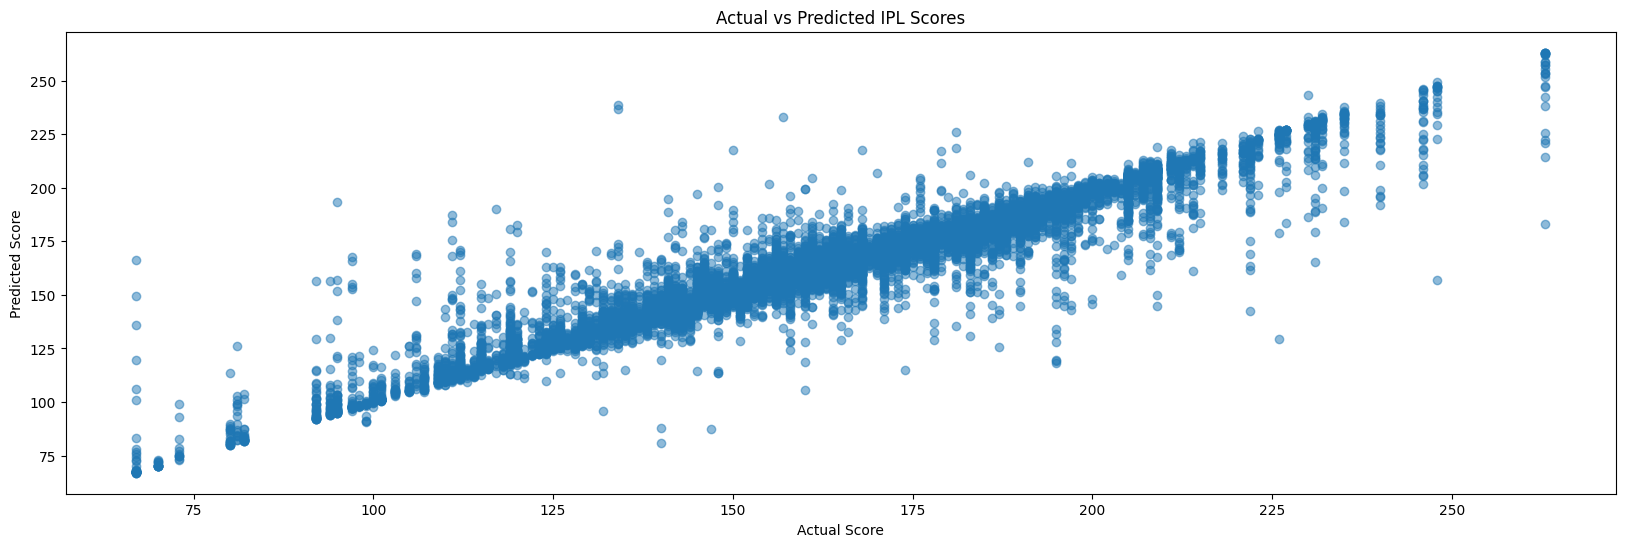

In [19]:
plt.figure(figsize=(20,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Actual vs Predicted IPL Scores")
plt.show()

# Converting Actual & Predicted Scores to Classes

In [22]:
def score_to_class(score):
    if score < 150:
        return 0
    elif score < 170:
        return 1
    elif score < 190:
        return 2
    else:
        return 3

y_test_class = y_test.apply(score_to_class)
y_pred_class = pd.Series(y_pred).apply(score_to_class)


# Calculate Classification Metrics

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test_class, y_pred_class)
precision = precision_score(y_test_class, y_pred_class, average='weighted')
recall = recall_score(y_test_class, y_pred_class, average='weighted')
f1 = f1_score(y_test_class, y_pred_class, average='weighted')

print("Accuracy :", f"{accuracy*100:.2f}%")
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)


Accuracy : 85.40%
Precision: 0.8609959275581226
Recall   : 0.8540419654015655
F1 Score : 0.8549318404330393


# Confusion Matrix

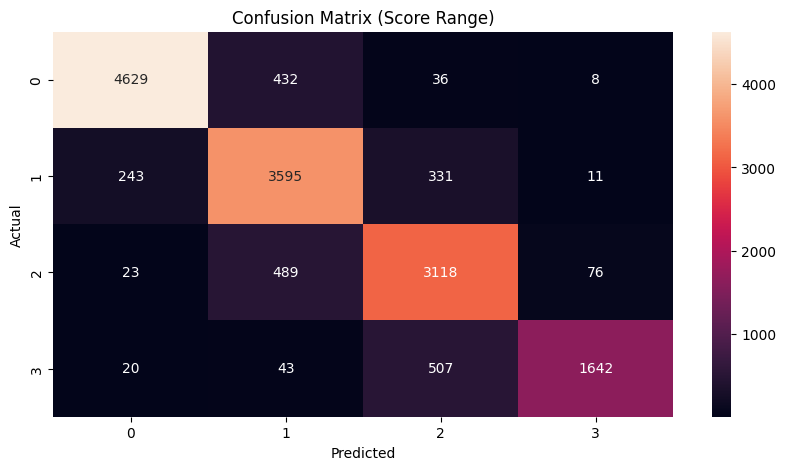

In [35]:
import seaborn as sns

cm = confusion_matrix(y_test_class, y_pred_class)

plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt="d")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Score Range)")
plt.show()